# Glossary
<b>FL_DATE</b> = Date of the Flight<br>
<b>OP_CARRIER</b> = Airline Identifier<br>
<b>OP_CARRIER_FL_NUM</b> = Flight Number<br>
<b>ORIGIN</b> = Starting Airport Code<br>
<b>DEST</b> = Destination Airport Code<br>
<b>CRS_DEP_TIME</b> = Planned Departure Time<br>
<b>DEP_TIME</b> = Actual Departure Time<br>
<b>DEP_DELAY</b> = Total Delay on Departure in minutes<br>
<b>TAXI_OUT</b> = The time duration elapsed between departure from the origin airport gate and wheels off<br>
<b>WHEELS_OFF</b> = The time point that the aircraft's wheels leave the ground<br>
<b>WHEELS_ON</b> = The time point that the aircraft'ss wheels touch on the ground<br>
<b>TAXI_IN</b> = The time duration elapsed between wheels-on and gate arrival at the destination airport<br>
<b>CRS_ARR_TIME</b> = Planned arrival time<br>
<b>ARR_TIME</b> = Actual Arrival Time = ARRIVAL_TIME - SCHEDULED_ARRIVAL<br>
<b>ARR_DELAY</b> = Total Delay on Arrival in minutes<br>
<b>CANCELLED</b> = Flight Cancelled (1 = cancelled)<br>
<b>CANCELLATION_CODE</b> = Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security<br>
<b>DIVERTED</b> = Aircraft landed on different airport that the one scheduled<br>
<b>CRS_ELAPSED_TIME</b> = Planned time amount needed for the flight trip<br>
<b>ACTUAL_ELAPSED_TIME</b> = AIR_TIME+TAXI_IN+TAXI_OUT<br>
<b>AIR_TIME</b> = The time duration between wheels_off and wheels_on time<br>
<b>DISTANCE</b> = Distance between two airports<br>
<b>CARRIER_DELAY</b> = Delay caused by the airline in minutes<br>
<b>WEATHER_DELAY</b> = Delay caused by weather<br>
<b>NAS_DELAY</b> = Delay caused by air system<br>
<b>SECURITY_DELAY</b> = caused by security reasons<br>
<b>LATE_AIRCRAFT_DELAY</b> = Delay caused by security<br>

Source: <a href="https://www.kaggle.com/yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018/version/1?select=2009.csv">Kaggle</a><br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

# Data Loading

In [2]:
df1 = pd.read_csv('df1.csv', index_col=0)
df1.head(3).append(df1.tail(3))

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,MONTH_AB,FLIGHT_STATUS
0,2018-01-01,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,1,1,Jan,0
1,2018-01-01,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414.0,1,1,Jan,0
2,2018-01-01,United Airlines,Santa Ana,Denver,3,-5.0,15.0,3,3,5.0,3,-13.0,134.0,126.0,106.0,846.0,1,1,Jan,0
7213443,2018-12-31,American Airlines,Charlotte,Memphis,4,-5.0,36.0,4,4,4.0,4,11.0,112.0,128.0,88.0,511.0,31,12,Dec,1
7213444,2018-12-31,American Airlines,Charlotte,Raleigh,3,23.0,11.0,3,3,4.0,3,14.0,50.0,41.0,26.0,130.0,31,12,Dec,1
7213445,2018-12-31,American Airlines,Raleigh,Charlotte,3,8.0,8.0,3,3,7.0,3,-4.0,71.0,59.0,44.0,130.0,31,12,Dec,0


In [3]:
df1.shape

(6992401, 20)

In [4]:
df1.isna().sum()

FL_DATE                0
OP_CARRIER             0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_DELAY              0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
DAY                    0
MONTH                  0
MONTH_AB               0
FLIGHT_STATUS          0
dtype: int64

In [5]:
df1.columns

Index(['FL_DATE', 'OP_CARRIER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_DELAY',
       'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME',
       'ARR_DELAY', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME',
       'DISTANCE', 'DAY', 'MONTH', 'MONTH_AB', 'FLIGHT_STATUS'],
      dtype='object')

In [6]:
df1 = df1[['FL_DATE', 'DAY', 'MONTH', 'MONTH_AB', 'OP_CARRIER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME',
           'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 
           'TAXI_IN', 'CRS_ARR_TIME', 'ARR_DELAY', 'CRS_ELAPSED_TIME', 
           'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'FLIGHT_STATUS']]
df1.head(2)

,FL_DATE,DAY,MONTH,MONTH_AB,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS
0,2018-01-01,1,1,Jan,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,0
1,2018-01-01,1,1,Jan,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414.0,0


# Visualizations: Single Plots

# Total number of flights per airline

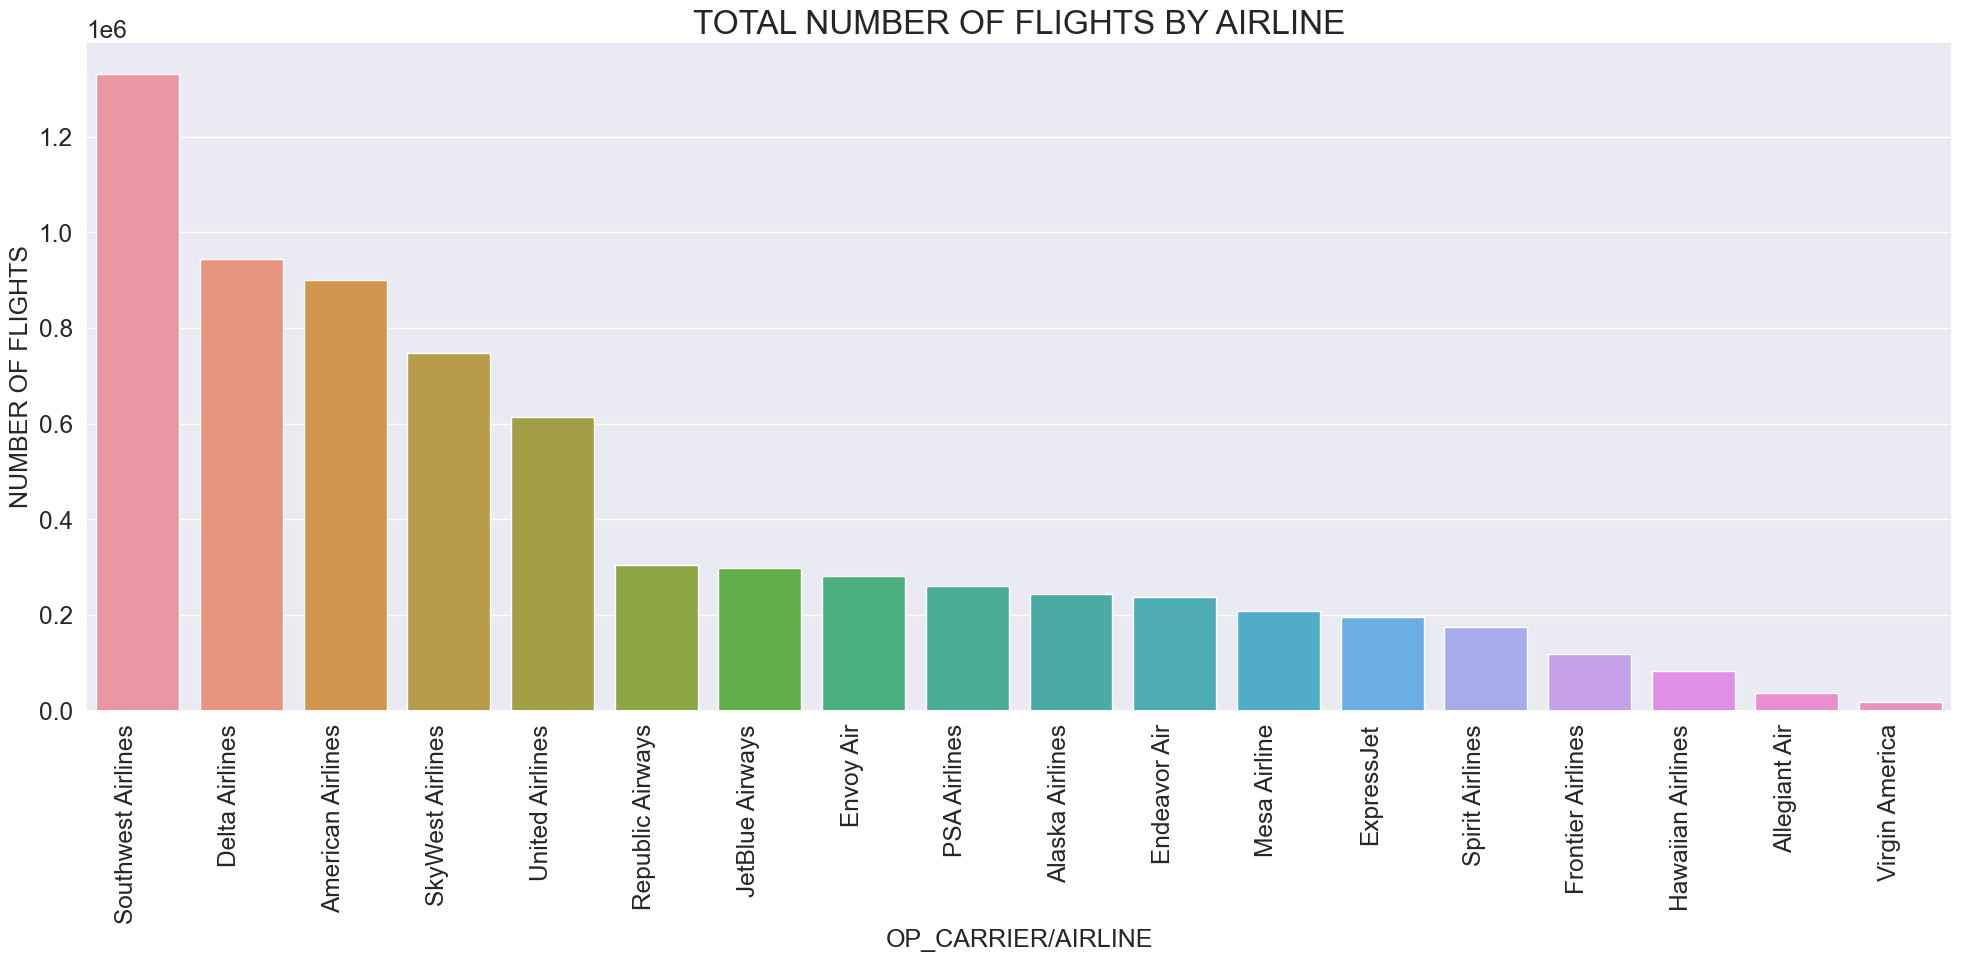

In [7]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df1['OP_CARRIER'], data=df1, order=df1['OP_CARRIER'].value_counts().iloc[0:18].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('TOTAL NUMBER OF FLIGHTS BY AIRLINE', fontsize=24)
plt.xlabel('OP_CARRIER/AIRLINE', fontsize=18)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=18)
plt.tight_layout()
plt.show()

The airlines with the most domestic flights in the US are:<br>
<b>1. Southwest Airlines</b><br>
<b>2. Delta Airlines</b><br>
<b>3. American Airlines</b><br> 
<b>4. SkyWest Airlines</b><br>
<b>5. United Airlines</b><br>


# Number of Delayed flights by Airlines

We will be using the FLIGHT_STATUS column by adding all of its values per airline and sorting them in descending order

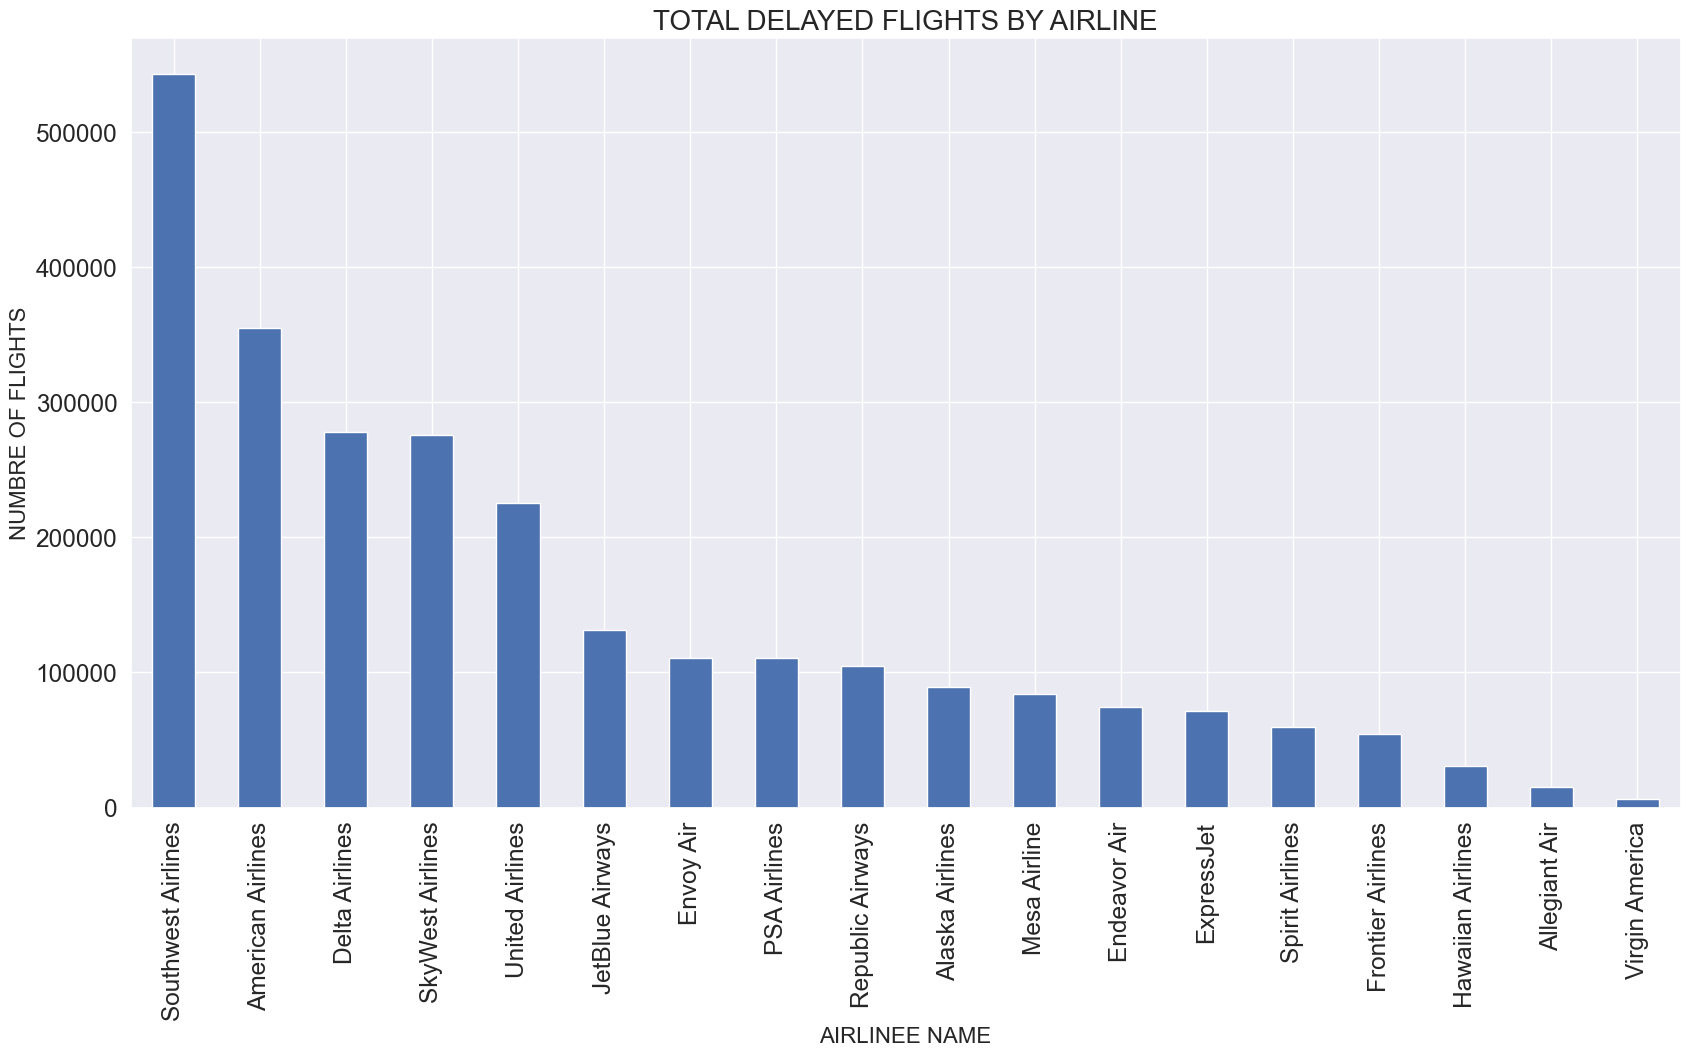

In [8]:
plt.figure(figsize=(20, 10))
df1.groupby('OP_CARRIER').FLIGHT_STATUS.sum().sort_values(ascending=False).plot.bar()
plt.title('TOTAL DELAYED FLIGHTS BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINEE NAME', fontsize=16)
plt.ylabel('NUMBRE OF FLIGHTS', fontsize=16)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

From this plot we can now extract the top 5 airlines with the most delayed flights, which are:<br>

<b>1. Southwest Airlines</b><br>
<b>2. American Airlines</b><br>
<b>3. SkyWest Airlines</b><br>
<b>4. Delta Airlines</b><br>
<b>5. United Airlines</b><br>

An airline that stands out of the pack is Republic Airways, they have the sixth largest number of flights and they are ranked number 9 out of 18 in terms of delayed flights.

# Percentage of delayed flights per airline

The first thing to calculate is the overall percentage of delayed flights so that we can do proper comparisons with each airline. In other words, airlines would want to be below the average percentage of delayed flights to be in an acceptable position, so that number will represent our threshold. Airlines above would the ones that travellers would want to avoid as it means those will have the most delays

In [10]:
df1.FLIGHT_STATUS.value_counts(normalize=True)

0    0.625075
1    0.374925
Name: FLIGHT_STATUS, dtype: float64

0 reoresents the flights that arrive on time and 1 is for delayed flights, therefore 37.52% of flights are delayed and that is a rather high percentage, meaning that around 1 out of every 3 flights is normally delayed.

 The steps to do that are the following:<br>

1. Create a new dataframe with only the columns of interest: 'OP_CARRIER' and 'FLIGHT_STATUS'<br>
2. Check the shape of the dataframe to make sure that we have not missed any rows
3. Do a non-normalize .value_counts() to know the number of delayed flights<br>
4. Create a temp_1 dataframe doing a groupby OP_CARRIER and FLIGHT_STATUS so that all the 1s (ones) are added and assign to their corresponding airline<br>
5. Create a temp_2 dataframe directly from the value_counts() over the OP_CARRIER to get the total number of flights again, rename_axis to OP_CARRIER and reset_index to TOTAL_FLIGHTS<br>
6. Merge the test_1 and test_2 dataframes on the OP_CARRIER column<br>
7. Create a new column that will represent the percentage of delayed flights
8. Display the entire dataframe to QC it and if necessary rename any columns<br>
9. Do a quick sum of all the FLIGHT_STATUS column and compare it to the output from the non-normalize .value_counts()<br>
10. Plot the results with a horizontal line representing our threshold value of 37.52%


In [11]:
# 1. Creating the new dataframe with the columns of my interest
df1_PFD = df1[['OP_CARRIER', 'FLIGHT_STATUS']]
df1_PFD.head()

,OP_CARRIER,FLIGHT_STATUS
0,United Airlines,0
1,United Airlines,0
2,United Airlines,0
3,United Airlines,0
4,United Airlines,1


In [12]:
# 2. Shape to check the size of the dataframe and that we have not lost any rows for any reason
df1_PFD.shape

(6992401, 2)

In [13]:
# 3. Non-normalize value_count()
df1_PFD.FLIGHT_STATUS.value_counts()

0    4370778
1    2621623
Name: FLIGHT_STATUS, dtype: int64

In [14]:
# 4. Create another dataframe (test_1) grouping the airline names and adding all the FLIGHT_STATUS values
# This way you will obtain all the delayed flights
test_1 = df1_PFD.groupby(['OP_CARRIER']).sum().reset_index()

# 5. Create another dataframe (test_2) from the value_counts directly so that it has all the flights added per airline
# Rename the axis to OP_CARRIER and reset_index to TOTAL_FLIGHTS
test_2 = df1.OP_CARRIER.value_counts().rename_axis('OP_CARRIER').reset_index(name='TOTAL_FLIGHTS')

# 6. Merge the two dataframes (test_1 and test_2) using the OP_CARRIER as the common column
df_fp = pd.merge(test_1, test_2, on='OP_CARRIER')

# 7. Create a new column that will represent the percentage of delay flights
df_fp['PERCENTAGE_DELAYED'] = round((df_fp['FLIGHT_STATUS']*100)/df_fp['TOTAL_FLIGHTS'], 2)
df_fp.rename({'FLIGHT_STATUS': 'DELAYED_FLIGHTS'}, axis=1, inplace=True)

# 8. Display the entire dataframe
df_fp.head(20)

,OP_CARRIER,DELAYED_FLIGHTS,TOTAL_FLIGHTS,PERCENTAGE_DELAYED
0,Alaska Airlines,89483,242979,36.83
1,Allegiant Air,15167,35801,42.36
2,American Airlines,355079,899527,39.47
3,Delta Airlines,278386,943837,29.50
4,Endeavor Air,74553,236403,31.54
5,Envoy Air,110693,282205,39.22
6,ExpressJet,71497,196583,36.37
7,Frontier Airlines,54120,117364,46.11
8,Hawaiian Airlines,30381,83375,36.44
9,JetBlue Airways,131673,297758,44.22


So there we have our dataframe alphabetically ordered with the three columns of our interest:<br>

* DELAYED_FLIGHTS<br>
* TOTAL_FLIGHTS<br>
* PERCENTAGE_DELAYED<br>

In [15]:
# 9. Double checking that that total delayed flights match from both sources
SUM = df_fp.DELAYED_FLIGHTS.sum()
print('Total number of delayed flights:', SUM)

Total number of delayed flights: 2621623


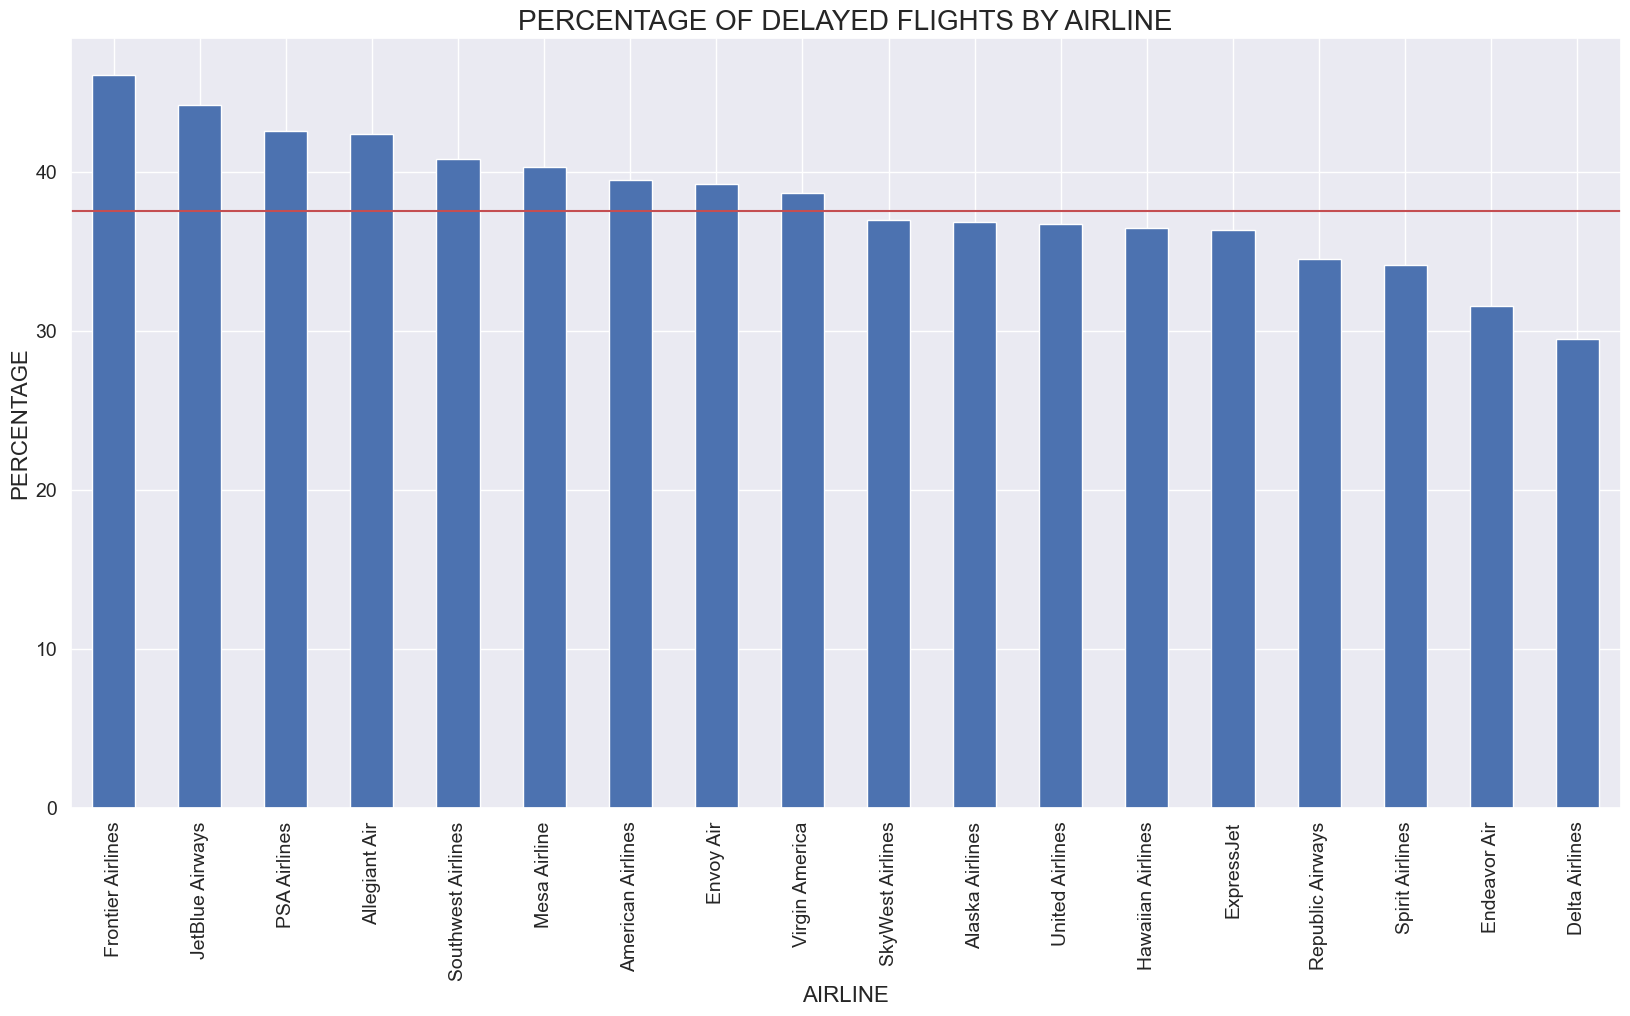

In [16]:
# 10. Plot with the 37.52% threshold value as a horizontal red line
plt.figure(figsize=(20, 10))
df_fp.groupby('OP_CARRIER').PERCENTAGE_DELAYED.sum().sort_values(ascending=False).plot.bar(fontsize=14)
plt.hlines(y=37.52, xmin=-1, xmax=18, colors='r', linestyles='solid', label='cutoff')
plt.title('PERCENTAGE OF DELAYED FLIGHTS BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINE', fontsize=16)
plt.ylabel('PERCENTAGE', fontsize=16)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.show()

## Observations
* Delta Airlines is the second airline with the highest number of flights, at the same time is the forth with the highest number of delayed flights, but in terms of percentage of delayed flights, it is the airline with the best percentage at 29.50%. That represents 8% below the threshold.<br>

* Southwest Airlines has the most flights and most delayed flights as well, but as our last plot suggests, it is not the worst, it is the 5th worst and still is above the threshold value by over 3%, so definitely not great compared to Delta Airlines<br>

* SkyWest and United Airlines, are the number 4 and 5 respectively in terms of number of flights, and third and 5th in terms of number of delayed flights. However, both are in a good position in terms of percentages of delayed flights by being below the threshold. So a couple more that are performing well.

# Total minutes delayed by an airline

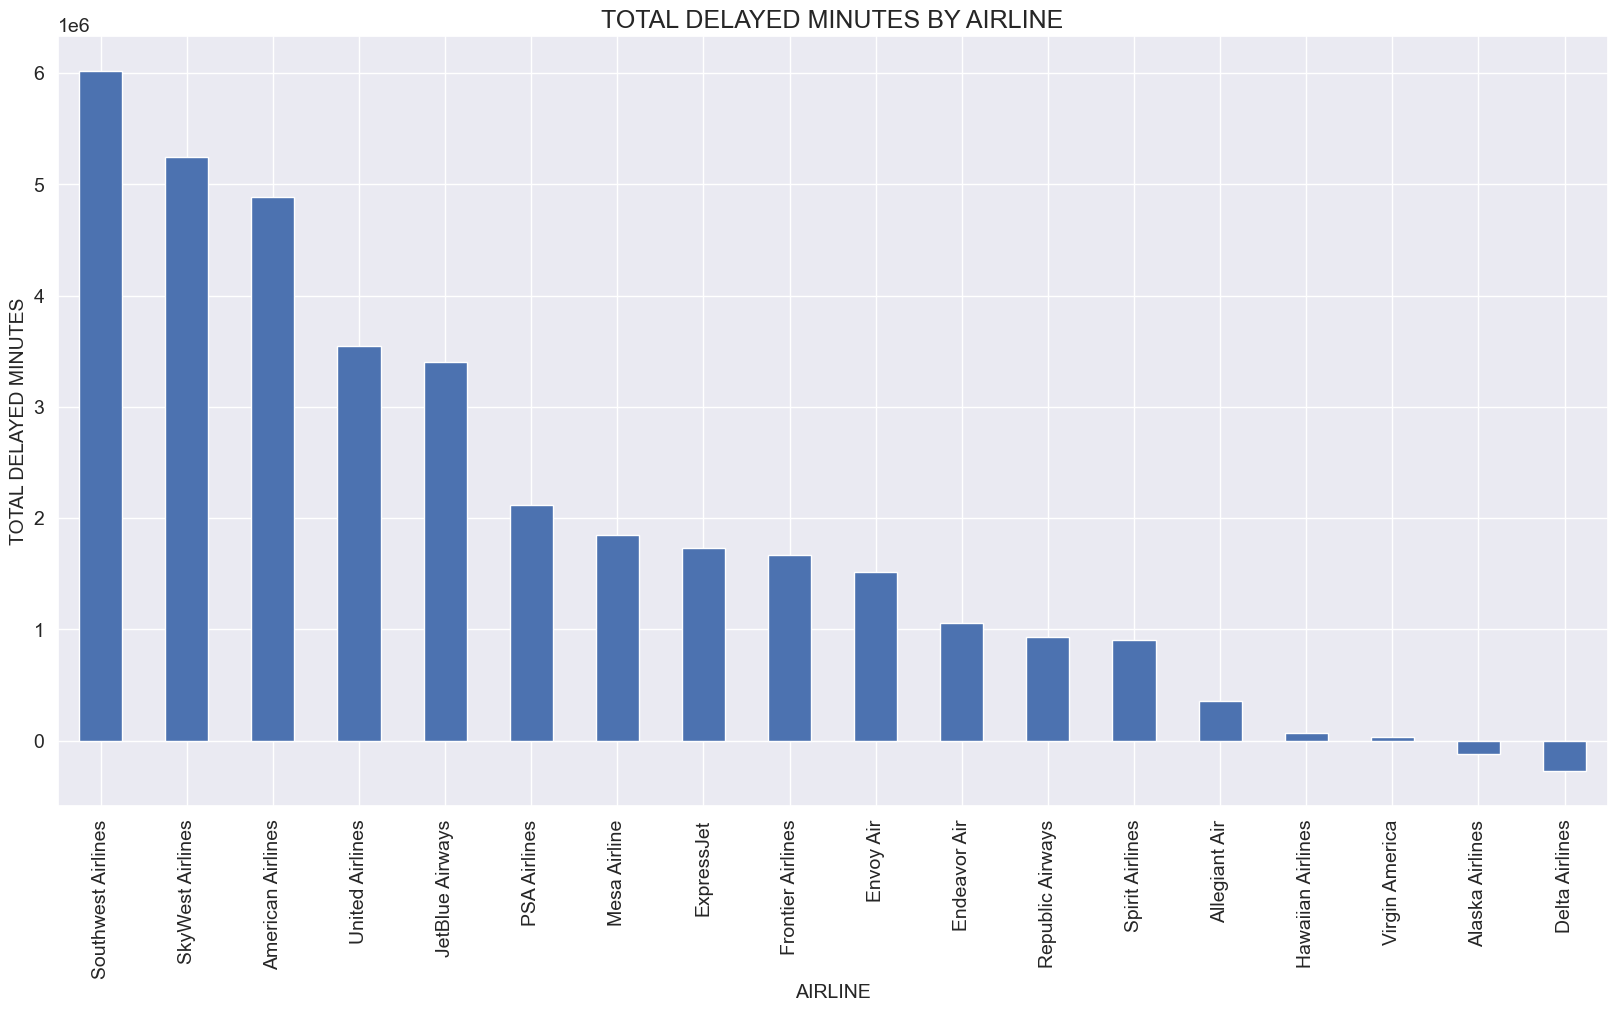

In [17]:
plt.figure(figsize=(20, 10))
df1.groupby('OP_CARRIER').ARR_DELAY.sum().sort_values(ascending=False).plot.bar()
plt.title('TOTAL DELAYED MINUTES BY AIRLINE', fontsize=18)
plt.xlabel('AIRLINE', fontsize=14)
plt.ylabel('TOTAL DELAYED MINUTES', fontsize=14)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

This plot produces sone interesting results about Delta airlines. Even though it is at the top in terms of the number of delayed flights, the total number of minutes delayed is negative and it is lowest of all. 

It is negative because there are a lot of flights that arrive earlier than expected, and therefore ARR_DELAY is a negative number instead of positive

# Average Delay Time

For the sake of faster and easier visualization, we will create a separate dataframe with only two columns: OP_CARRIER (airline) and ARR_DELAY (Delay), we will call it test_3. We will also sort the average delay on the arrival column in ascending order. The reason for choosing ascending order is because this is a negative statistic, therefore, the airline with the lowest value will be the better one.

In [18]:
df1.head(2)

,FL_DATE,DAY,MONTH,MONTH_AB,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS
0,2018-01-01,1,1,Jan,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,0
1,2018-01-01,1,1,Jan,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414.0,0


In [19]:
test_3 = df1[['OP_CARRIER', 'ARR_DELAY']]
test_3 = test_3.groupby(['OP_CARRIER']).mean().reset_index()
test_3.rename({'ARR_DELAY': 'AVG_DELAY'}, axis=1, inplace=True)
test_3 = test_3.sort_values(['AVG_DELAY']).reset_index(drop=True)
test_3.head(18)

,OP_CARRIER,AVG_DELAY
0,Alaska Airlines,-0.501562
1,Delta Airlines,-0.289825
2,Hawaiian Airlines,0.851310
3,Virgin America,1.727978
4,Republic Airways,3.066121
5,Endeavor Air,4.452778
6,Southwest Airlines,4.519644
7,Spirit Airlines,5.171453
8,Envoy Air,5.383186
9,American Airlines,5.432065


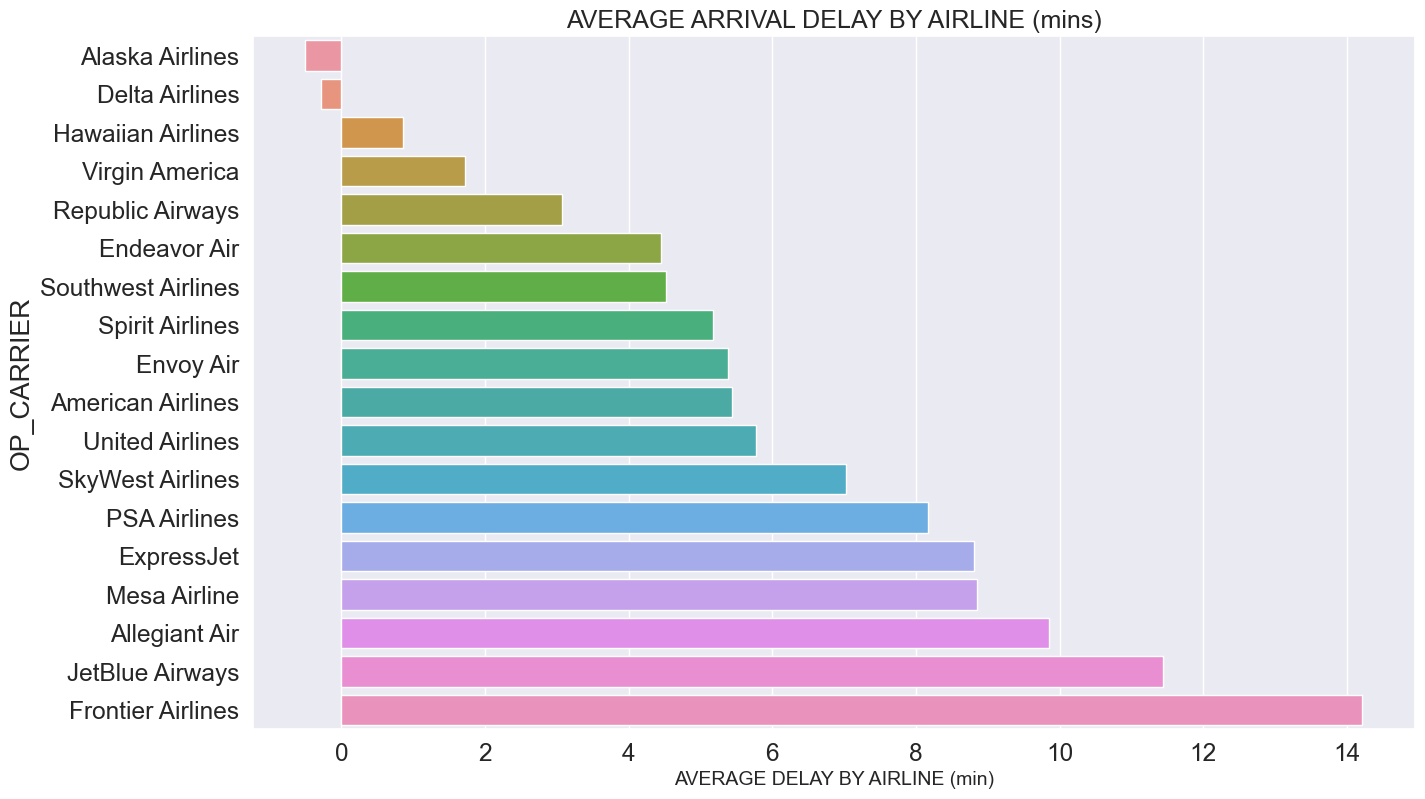

In [20]:
fig = plt.figure(1, figsize=(15,9))
sns.set(font_scale=1.6)
ax = sns.barplot(x='AVG_DELAY', y='OP_CARRIER', data=test_3)
ax.set_title('AVERAGE ARRIVAL DELAY BY AIRLINE (mins)', fontsize=18)
ax.set_xlabel('AVERAGE DELAY BY AIRLINE (min)', fontsize=14)
plt.show()

Another result yielding Delta Airlines as one of the best

We know that delta is top 5 in terms of number of flights, also top 5 in delayed flights. This last one is because of the number of flights they operate, but when we look at other values such as percentages or delayed flights, they are the best, also with total minutes delayed, they are in negative. So a quick conclusion here is that Delta Airline even though having a lot of delayed flights, the delay times are minimal.

# 20 Most Common Destinations (Cities)

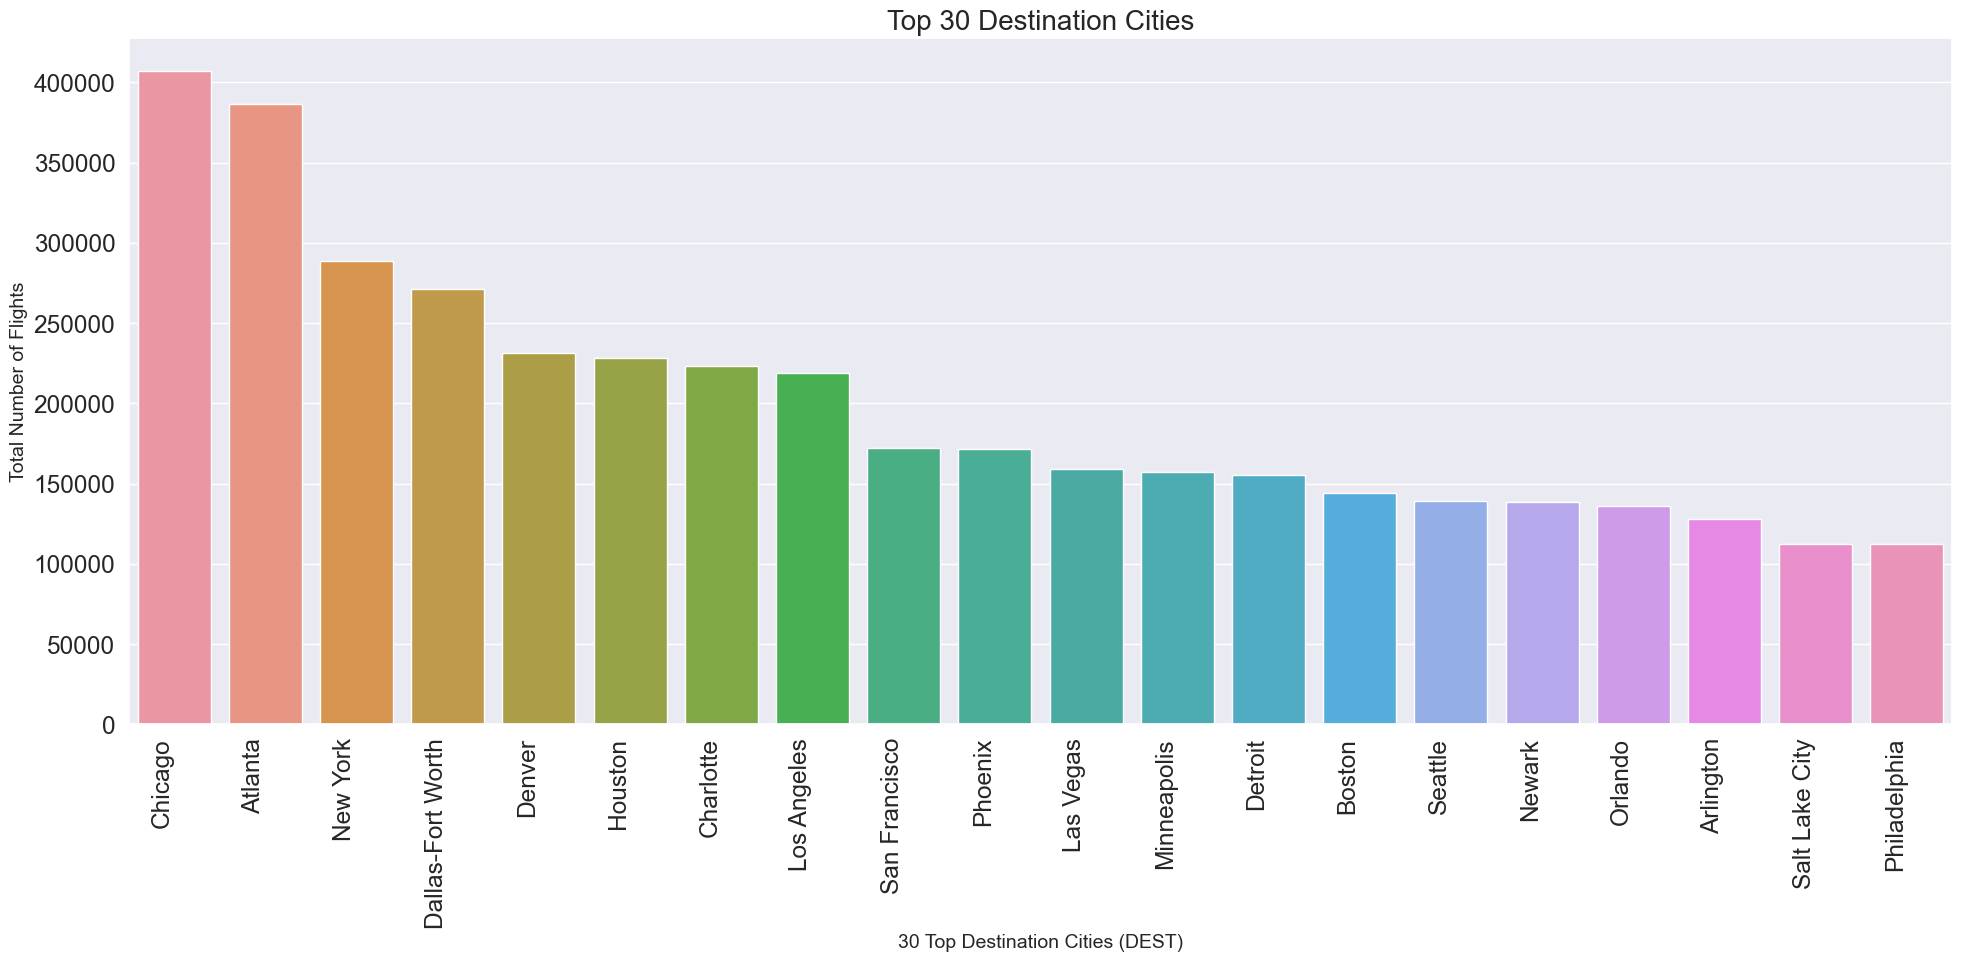

In [21]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df1['DEST'], data=df1, order=df1['DEST'].value_counts().iloc[0:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('Top 30 Destination Cities', fontsize=20)
plt.xlabel('30 Top Destination Cities (DEST)', fontsize=14)
plt.ylabel('Total Number of Flights', fontsize=14)
plt.tight_layout()
plt.show()

# Worst and Best months to travel based on flight delays

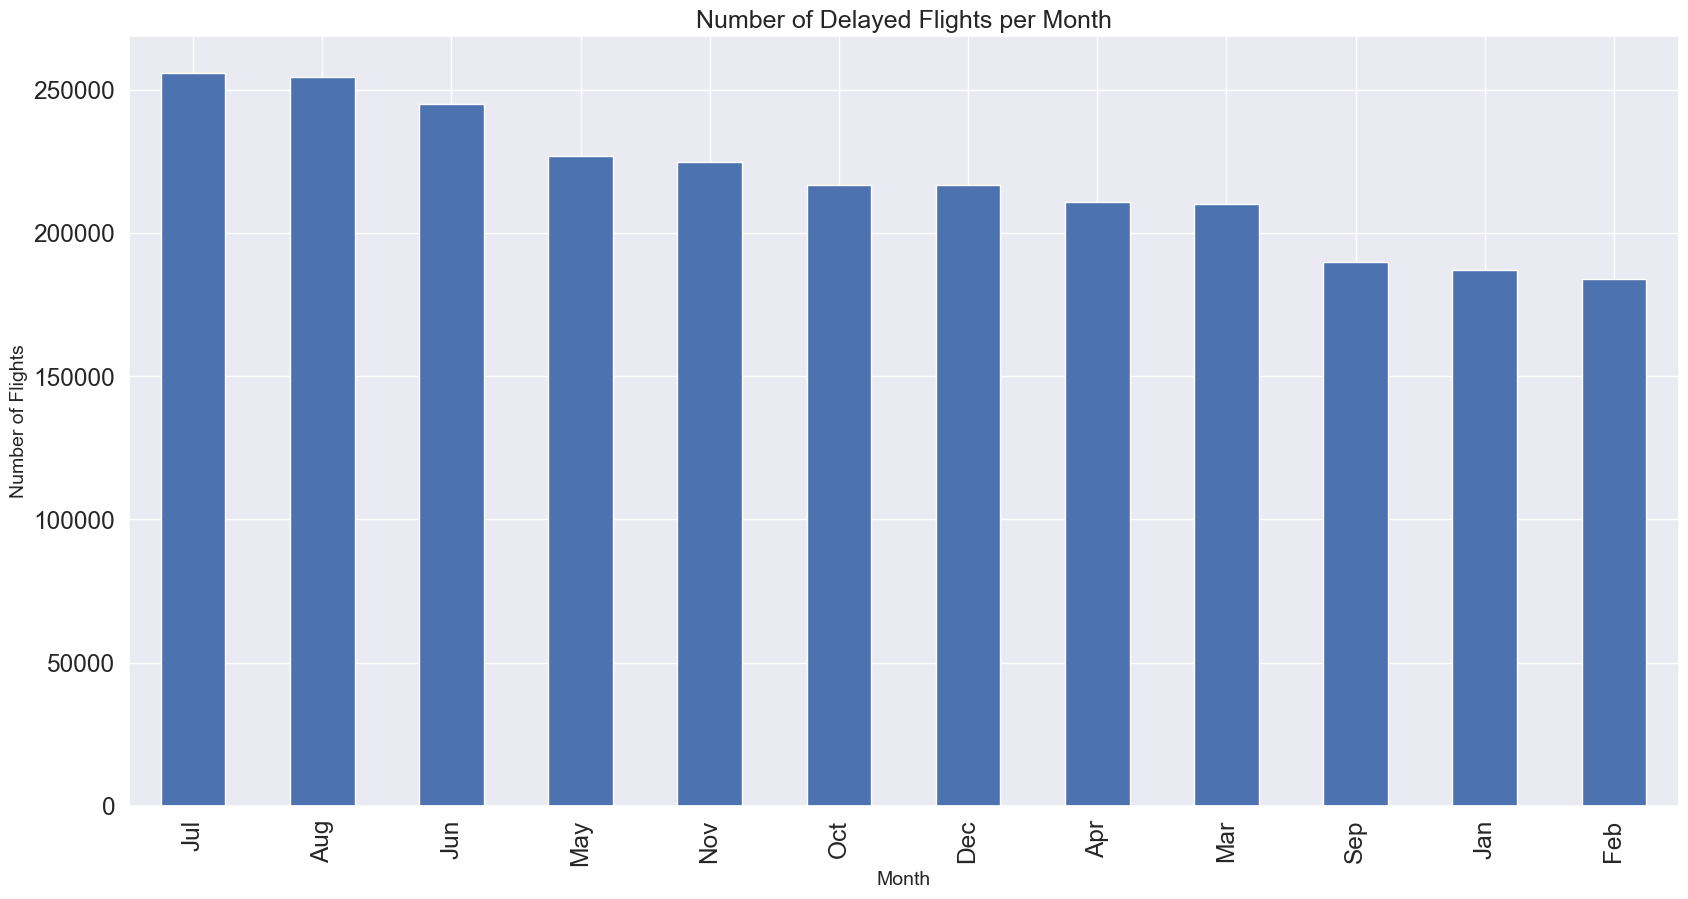

In [23]:
plt.figure(figsize=(20, 10))
df1.groupby('MONTH_AB').FLIGHT_STATUS.sum().sort_values(ascending=False).plot.bar()
plt.title('Number of Delayed Flights per Month', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

According to this data the months with the most delayed flights are July, August, June and May, basically Summer months (in America). These are followed to November, December and October, which are the end of the year including Christmas. The best months to travel are February, January and September, after the standard holidays.

# Is there a better day to travel?

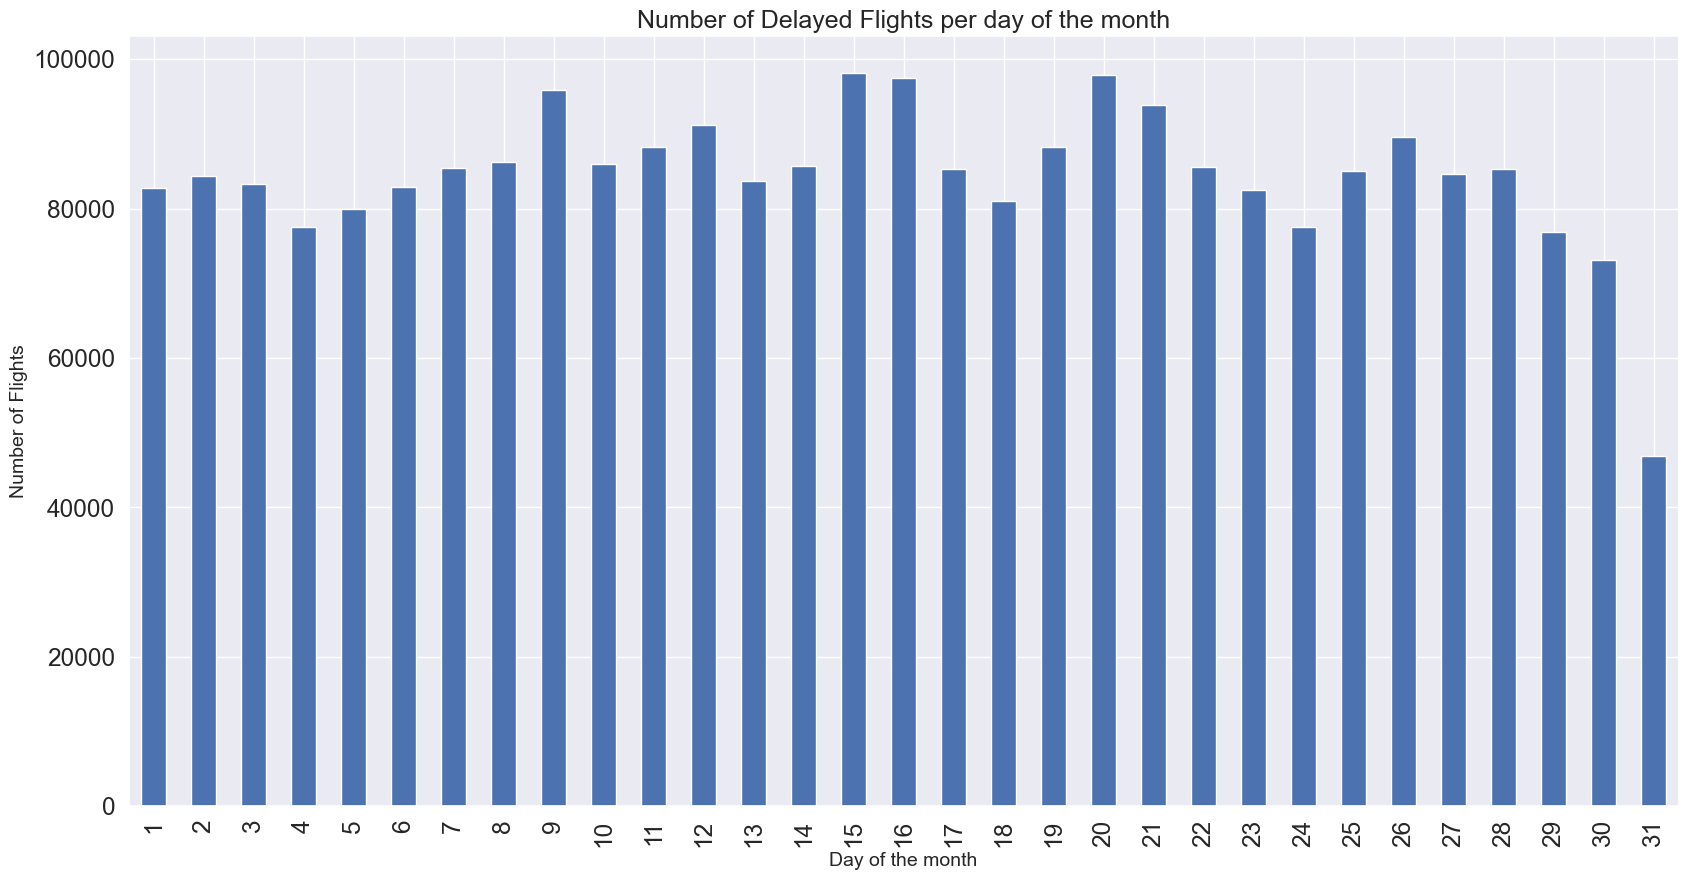

In [24]:
plt.figure(figsize=(20, 10))
df1.groupby('DAY').FLIGHT_STATUS.sum().plot.bar()
plt.title('Number of Delayed Flights per day of the month', fontsize=18)
plt.xlabel('Day of the month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

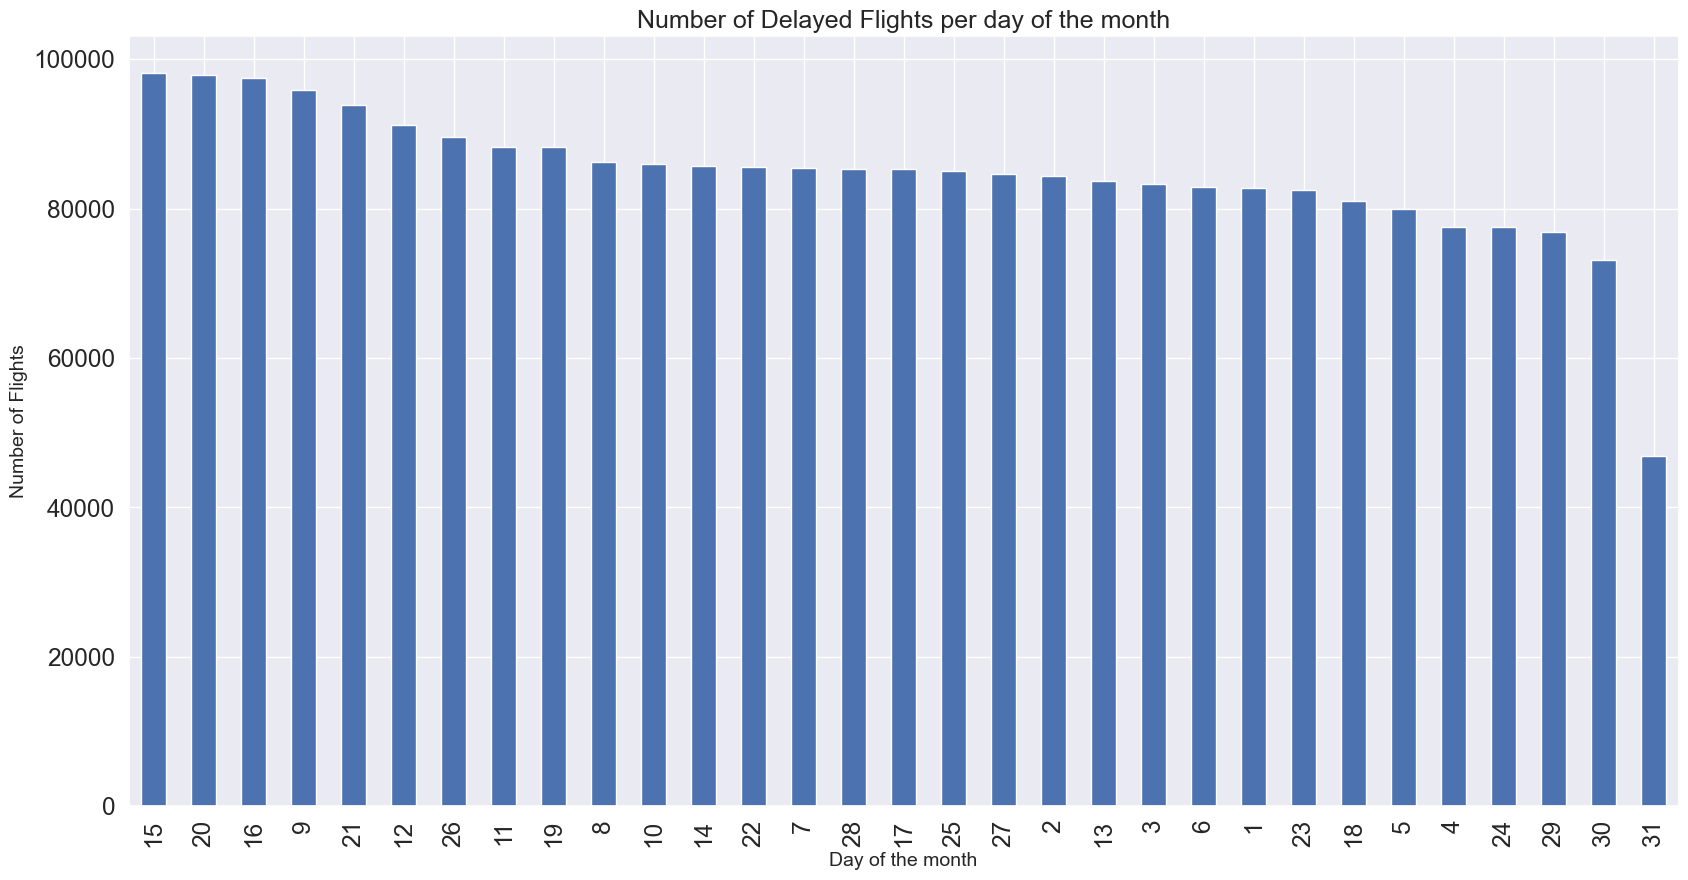

In [25]:
plt.figure(figsize=(20, 10))
barplot =df1.groupby('DAY').FLIGHT_STATUS.sum().sort_values(ascending=False).plot.bar()
plt.title('Number of Delayed Flights per day of the month', fontsize=18)
plt.xlabel('Day of the month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

The observations do not provide any conclusive evidence.

# Impact of Delays (Departure vs. Arrival Delay)

In this visualization, we will try to analyze both arrival and departure delays and try to figure out which one has a larger impact overall.

We will be assuming that if the departure is on time and the flight is late on arrival, means something else increased your elapsed time, which is supposed to be the planned time needed for the flight trip

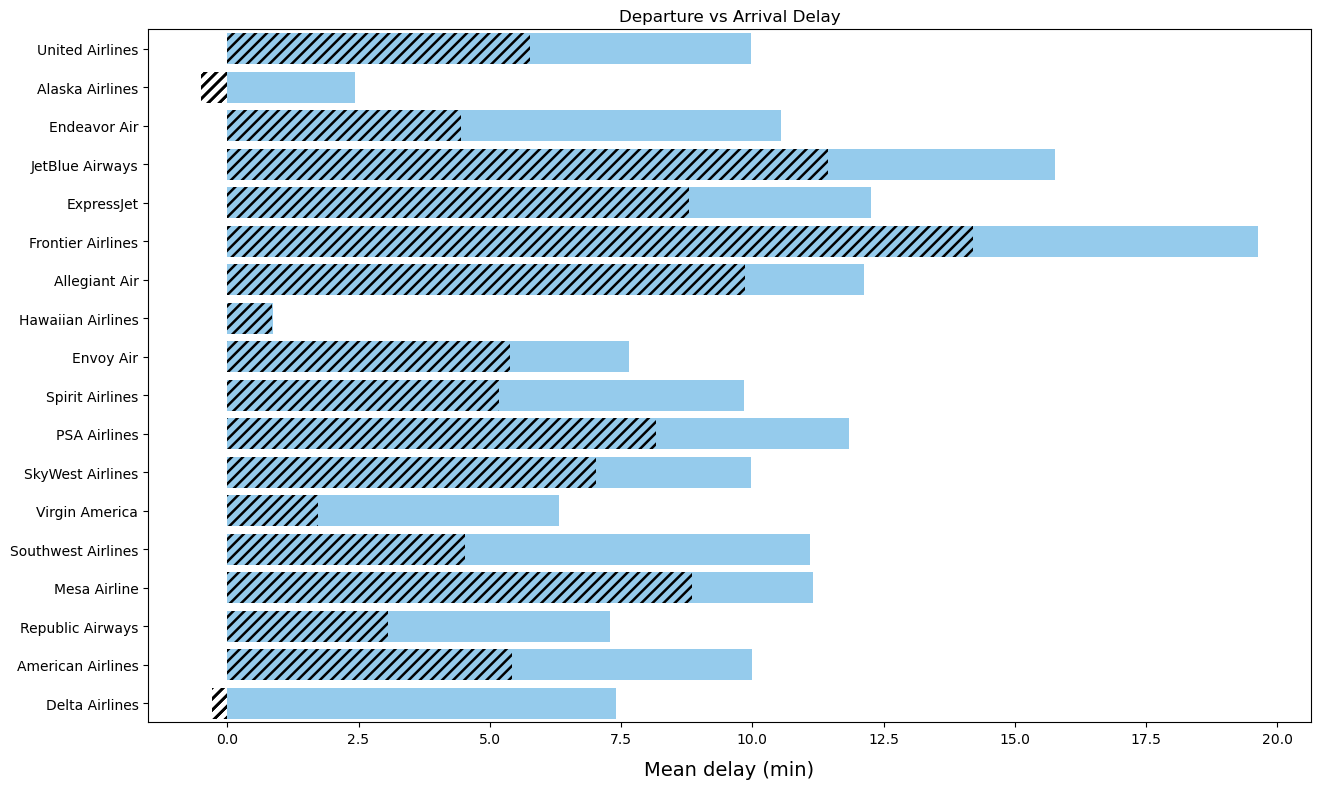

In [28]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 1.8  

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="DEP_DELAY", y="OP_CARRIER", data=df1, color="lightskyblue", ci=None)
ax = sns.barplot(x="ARR_DELAY", y="OP_CARRIER", data=df1, color="r", hatch = '///', alpha = 0.0, ci=None)
ax.yaxis.label.set_visible(False)
plt.title('Departure vs Arrival Delay')
plt.xlabel('Mean delay (min)', fontsize=14, labelpad=10);
plt.show()

The departure delay is the light blue color and the ariival delay is the dashed line.

The results of this plot suggest that ARR_DELAYS generally lower than the DEP_DELAYS and as mentioned above, this suggests that the airlines try to adjust their flight speed to try and compensate for the late departure and reduce the ARR_DELAY

Another interesting piece of information about Delta Airlines. Once again, the arrivals are negatice. This means that whenever they leave late, they compensate by reducing the time of the flights to arrive on time or in average earlier.

In [29]:
df1_LA = df1[(df1['ARR_DELAY'] >= 15)]

In [30]:
df1.shape

(6992401, 20)

In [31]:
df1_LA.shape

(1334438, 20)

In [32]:
df1_LD = df1[(df1['DEP_DELAY'] > 15)]
df1_LD.shape

(1237914, 20)

In [33]:
df1_LD.DEP_DELAY.describe()

count    1.237914e+06
mean     6.783579e+01
std      8.329954e+01
min      1.600000e+01
25%      2.500000e+01
50%      4.200000e+01
75%      7.900000e+01
max      2.710000e+03
Name: DEP_DELAY, dtype: float64

# Most popular destinations with Average arrival delays

In [34]:
df1.head()

,FL_DATE,DAY,MONTH,MONTH_AB,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS
0,2018-01-01,1,1,Jan,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,0
1,2018-01-01,1,1,Jan,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414.0,0
2,2018-01-01,1,1,Jan,United Airlines,Santa Ana,Denver,3,-5.0,15.0,3,3,5.0,3,-13.0,134.0,126.0,106.0,846.0,0
3,2018-01-01,1,1,Jan,United Airlines,Ft. Myers,Chicago,3,6.0,19.0,3,3,6.0,3,-2.0,190.0,182.0,157.0,1120.0,0
4,2018-01-01,1,1,Jan,United Airlines,Chicago,Albany,2,20.0,13.0,2,2,10.0,2,14.0,112.0,106.0,83.0,723.0,1


In [35]:
test_4 = df1[['DEST', 'ARR_DELAY']]
test_4 = test_4.groupby(['DEST']).mean().reset_index()
test_4.head(10)

,DEST,ARR_DELAY
0,Aberdeen,3.716621
1,Abilene,5.784016
2,Adak,-6.079208
3,Agana,4.552198
4,Aguadilla,14.286742
5,Akron,13.740124
6,Albany,6.891646
7,Albuquerque,5.599697
8,Alexandria,3.554924
9,Allentown,5.898137


In [36]:
test_4.shape

(304, 2)

In [37]:
test_5 = df1.DEST.value_counts().rename_axis('DEST').reset_index(name='FLIGHTS').iloc[0:30]
test_5.head(30)

,DEST,FLIGHTS
0,Chicago,407267
1,Atlanta,386390
2,New York,288598
3,Dallas-Fort Worth,271201
4,Denver,231611
5,Houston,228072
6,Charlotte,223197
7,Los Angeles,219027
8,San Francisco,172189
9,Phoenix,171543


In [38]:
test_4_5 = pd.merge(test_5, test_4, on='DEST')
test_4_5.head()

,DEST,FLIGHTS,ARR_DELAY
0,Chicago,407267,7.080367
1,Atlanta,386390,2.913906
2,New York,288598,8.483590
3,Dallas-Fort Worth,271201,6.337034
4,Denver,231611,3.161599


In [39]:
test_4_5.describe()

,FLIGHTS,ARR_DELAY
count,30.000000,30.000000
mean,159339.433333,4.865538
std,89434.219726,3.176838
min,65186.000000,0.665390
25%,90982.000000,2.923139
50%,138795.500000,4.289747
75%,207317.500000,6.216232
max,407267.000000,16.652241


Because of the high number of destinations (340+), we will concentrace on only the top 30 

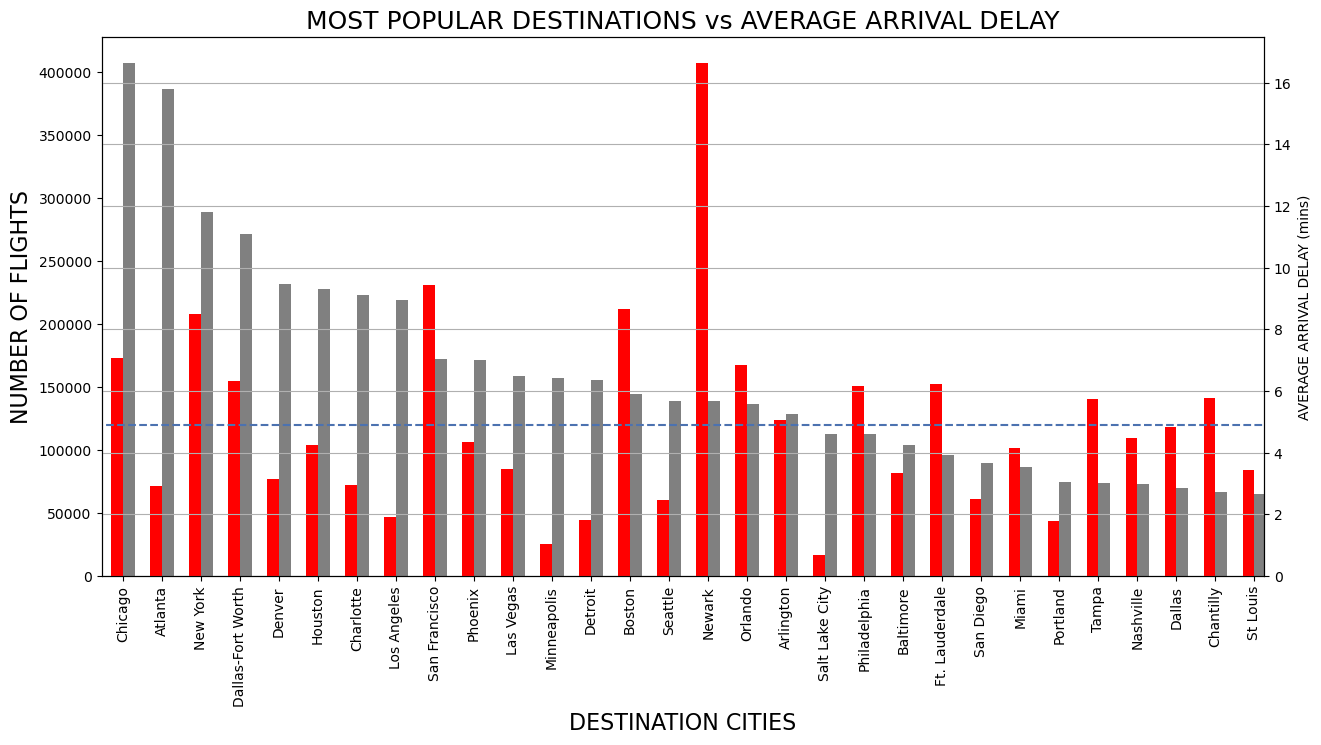

In [42]:
test_4_5 = test_4_5.set_index('DEST')

fig = plt.figure(figsize=(15,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = .3

test_4_5.FLIGHTS.plot(kind='bar',color='grey',ax=ax, width=width, position=0)
test_4_5.ARR_DELAY.plot(kind='bar',color='red', ax=ax2, width=width, position=1)

plt.hlines(y=4.90, xmin=-1, xmax=30, colors='b', linestyles='dashed', label='cutoff')

#ax.grid(None, axis=1)
ax2.grid(None)

ax.set_title('MOST POPULAR DESTINATIONS vs AVERAGE ARRIVAL DELAY', fontsize=18)
ax.set_ylabel('NUMBER OF FLIGHTS', fontsize=16)
ax2.set_ylabel('AVERAGE ARRIVAL DELAY (mins)')
ax.set_xlabel('DESTINATION CITIES', fontsize=16)

plt.show()

The dashed line that you see on the plot corresponds to the average delay on arrival of the top 30 destinations.  It is interesting to see how Atlanta, having such a high the number of landings, has a very low average delay with just over 2 minutes, whereas Newark, a not so popular destination, has such a high minute average delay. San Francisco is another destination that stands out with a high average delay as well as Orlando and Boston.

# Departure cities with the most ddelayed departure flights

In [43]:
df1.head()

,FL_DATE,DAY,MONTH,MONTH_AB,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS
0,2018-01-01,1,1,Jan,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,0
1,2018-01-01,1,1,Jan,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414.0,0
2,2018-01-01,1,1,Jan,United Airlines,Santa Ana,Denver,3,-5.0,15.0,3,3,5.0,3,-13.0,134.0,126.0,106.0,846.0,0
3,2018-01-01,1,1,Jan,United Airlines,Ft. Myers,Chicago,3,6.0,19.0,3,3,6.0,3,-2.0,190.0,182.0,157.0,1120.0,0
4,2018-01-01,1,1,Jan,United Airlines,Chicago,Albany,2,20.0,13.0,2,2,10.0,2,14.0,112.0,106.0,83.0,723.0,1


In [44]:
test_6 = df1[['ORIGIN', 'DEP_DELAY']]
test_6 = test_6.groupby(['ORIGIN']).mean().reset_index()
test_6.head(10)

,ORIGIN,DEP_DELAY
0,Aberdeen,7.667120
1,Abilene,8.033333
2,Adak,3.851485
3,Agana,8.021918
4,Aguadilla,15.551189
5,Akron,13.759247
6,Albany,8.568435
7,Albuquerque,8.623021
8,Alexandria,7.028443
9,Allentown,11.111312


In [45]:
test_7 = df1.ORIGIN.value_counts().rename_axis('ORIGIN').reset_index(name='FLIGHTS').iloc[0:30]
test_7.head(30)

,ORIGIN,FLIGHTS
0,Chicago,407972
1,Atlanta,386179
2,New York,289169
3,Dallas-Fort Worth,272267
4,Denver,231940
5,Houston,228365
6,Charlotte,223850
7,Los Angeles,218757
8,San Francisco,172122
9,Phoenix,171863


In [46]:
test_6_7 = pd.merge(test_7, test_6, on='ORIGIN')
test_6_7.head()

,ORIGIN,FLIGHTS,DEP_DELAY
0,Chicago,407972,12.759707
1,Atlanta,386179,9.543339
2,New York,289169,12.038248
3,Dallas-Fort Worth,272267,12.049011
4,Denver,231940,10.340773


In [47]:
test_6_7.shape

(30, 3)

In [48]:
test_6_7.describe()

,FLIGHTS,DEP_DELAY
count,30.000000,30.000000
mean,159440.700000,10.346833
std,89591.550011,2.273352
min,65033.000000,5.549091
25%,90953.250000,9.087848
50%,138946.500000,10.554420
75%,207098.250000,11.880836
max,407972.000000,14.815342


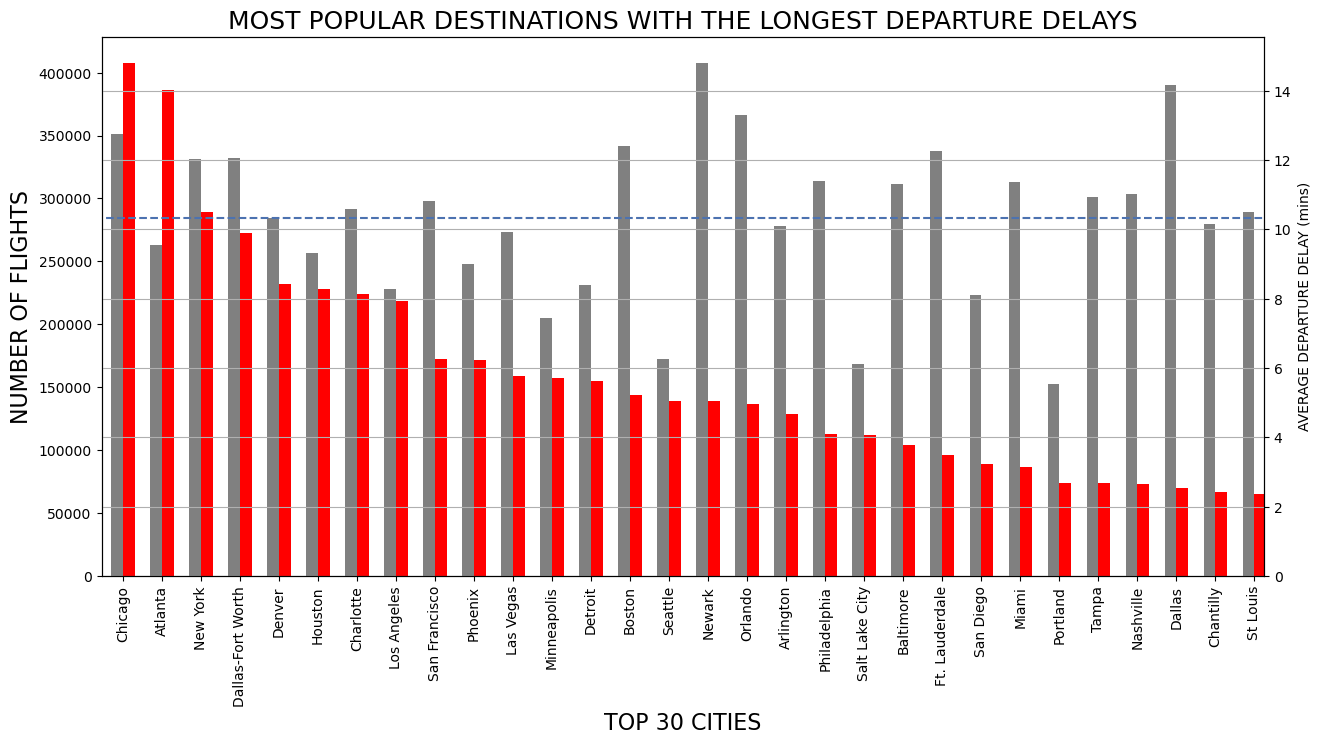

In [49]:
test_6_7 = test_6_7.set_index('ORIGIN')

fig = plt.figure(figsize=(15,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis
width = .3

test_6_7.FLIGHTS.plot(kind='bar',color='red',ax=ax, width=width, position=0)
test_6_7.DEP_DELAY.plot(kind='bar',color='grey', ax=ax2, width=width, position=1)

plt.hlines(y=10.345, xmin=-1, xmax=30, colors='b', linestyles='dashed', label='cutoff')

#ax.grid(None, axis=1)
ax2.grid(None)

ax.set_title('MOST POPULAR DESTINATIONS WITH THE LONGEST DEPARTURE DELAYS', fontsize=18)
ax.set_ylabel('NUMBER OF FLIGHTS', fontsize=16)
ax2.set_ylabel('AVERAGE DEPARTURE DELAY (mins)')
ax.set_xlabel('TOP 30 CITIES', fontsize=16)
plt.show()

It is clear here the importance of the DEPARTURE DELAYS for the flights arriving on time. 

# Number of destinations by airline

In [51]:
cities = df1[['OP_CARRIER', 'DEST', 'ARR_DELAY']]
cities = cities.groupby(['OP_CARRIER', 'DEST']).mean().reset_index()

In [52]:
cities.OP_CARRIER.value_counts()

SkyWest Airlines      238
Envoy Air             149
Delta Airlines        148
ExpressJet            141
Endeavor Air          130
Mesa Airline          118
United Airlines       114
American Airlines     108
Republic Airways      104
PSA Airlines           94
Frontier Airlines      93
Allegiant Air          91
Southwest Airlines     85
Alaska Airlines        75
JetBlue Airways        70
Spirit Airlines        44
Virgin America         27
Hawaiian Airlines      18
Name: OP_CARRIER, dtype: int64

In [53]:
temp = cities[(cities['OP_CARRIER'] == "Delta Airlines")]

In [54]:
temp.head()

,OP_CARRIER,DEST,ARR_DELAY
274,Delta Airlines,Akron,-0.635277
275,Delta Airlines,Albany,-3.156137
276,Delta Airlines,Albuquerque,-3.719858
277,Delta Airlines,Allentown,-3.693593
278,Delta Airlines,Anchorage,-1.581935


In [55]:
# I need to double check that this is really grabbing all the destinations per airline
# If it is I should be getting a 148.
temp.DEST.nunique()

148

In [56]:
cities_airline = cities.OP_CARRIER.value_counts().rename_axis('OP_CARRIER').reset_index(name='NUMBER_CITIES')
cities_airline.head(18)

,OP_CARRIER,NUMBER_CITIES
0,SkyWest Airlines,238
1,Envoy Air,149
2,Delta Airlines,148
3,ExpressJet,141
4,Endeavor Air,130
5,Mesa Airline,118
6,United Airlines,114
7,American Airlines,108
8,Republic Airways,104
9,PSA Airlines,94


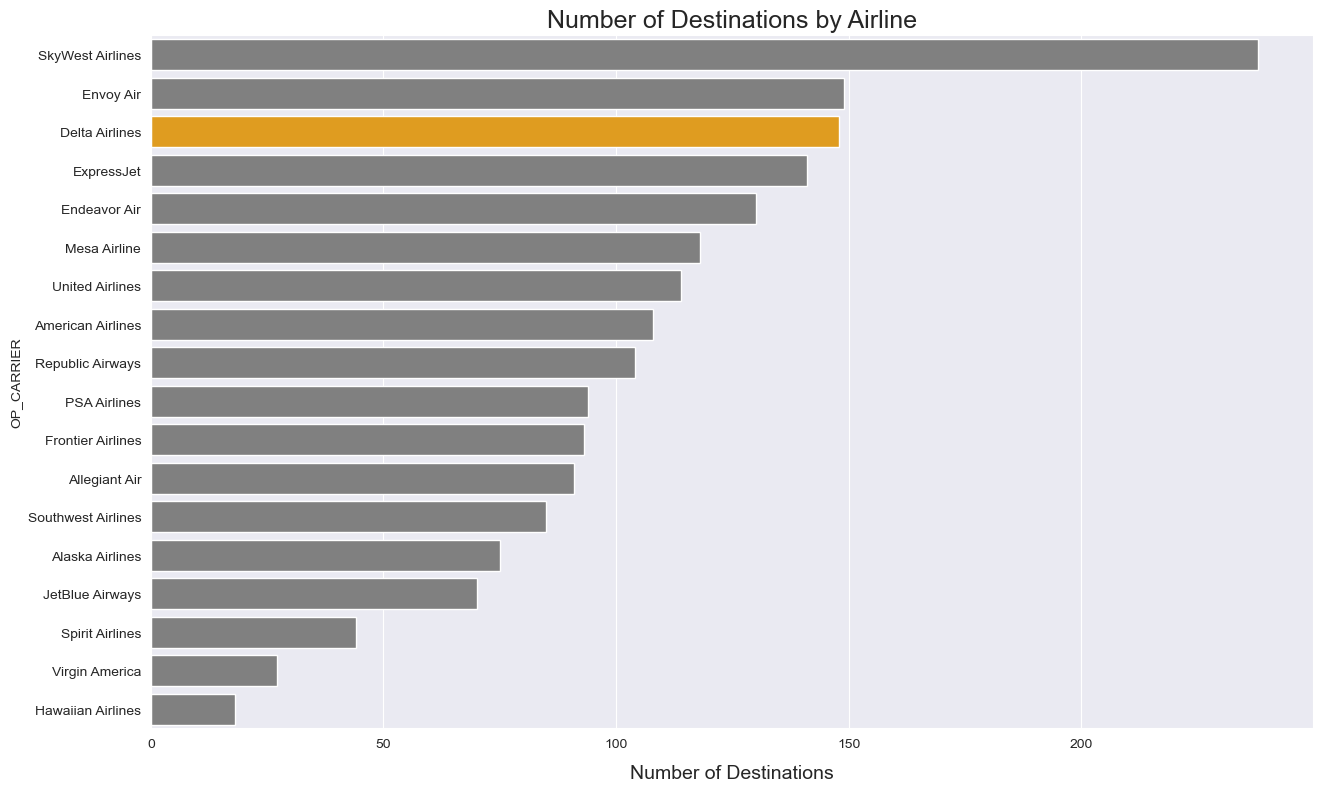

In [57]:
sns.set_style('darkgrid')

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="NUMBER_CITIES", y="OP_CARRIER", data=cities_airline, palette=["grey" if y!='Delta Airlines' else "orange" for y in cities_airline.OP_CARRIER])
plt.title('Number of Destinations by Airline', fontsize=18)
plt.xlabel('Number of Destinations', fontsize=14, labelpad=10);
plt.show()

In [58]:
df1.columns

Index(['FL_DATE', 'DAY', 'MONTH', 'MONTH_AB', 'OP_CARRIER', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON',
       'TAXI_IN', 'CRS_ARR_TIME', 'ARR_DELAY', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'FLIGHT_STATUS'],
      dtype='object')

In [59]:
df1['ARR-DEP_DELAY'] = df1['ARR_DELAY'] - df1['DEP_DELAY']
df1.head(3).append(df1.tail(3))

,FL_DATE,DAY,MONTH,MONTH_AB,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS,ARR-DEP_DELAY
0,2018-01-01,1,1,Jan,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,0,-18.0
1,2018-01-01,1,1,Jan,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414.0,0,-16.0
2,2018-01-01,1,1,Jan,United Airlines,Santa Ana,Denver,3,-5.0,15.0,3,3,5.0,3,-13.0,134.0,126.0,106.0,846.0,0,-8.0
7213443,2018-12-31,31,12,Dec,American Airlines,Charlotte,Memphis,4,-5.0,36.0,4,4,4.0,4,11.0,112.0,128.0,88.0,511.0,1,16.0
7213444,2018-12-31,31,12,Dec,American Airlines,Charlotte,Raleigh,3,23.0,11.0,3,3,4.0,3,14.0,50.0,41.0,26.0,130.0,1,-9.0
7213445,2018-12-31,31,12,Dec,American Airlines,Raleigh,Charlotte,3,8.0,8.0,3,3,7.0,3,-4.0,71.0,59.0,44.0,130.0,0,-12.0


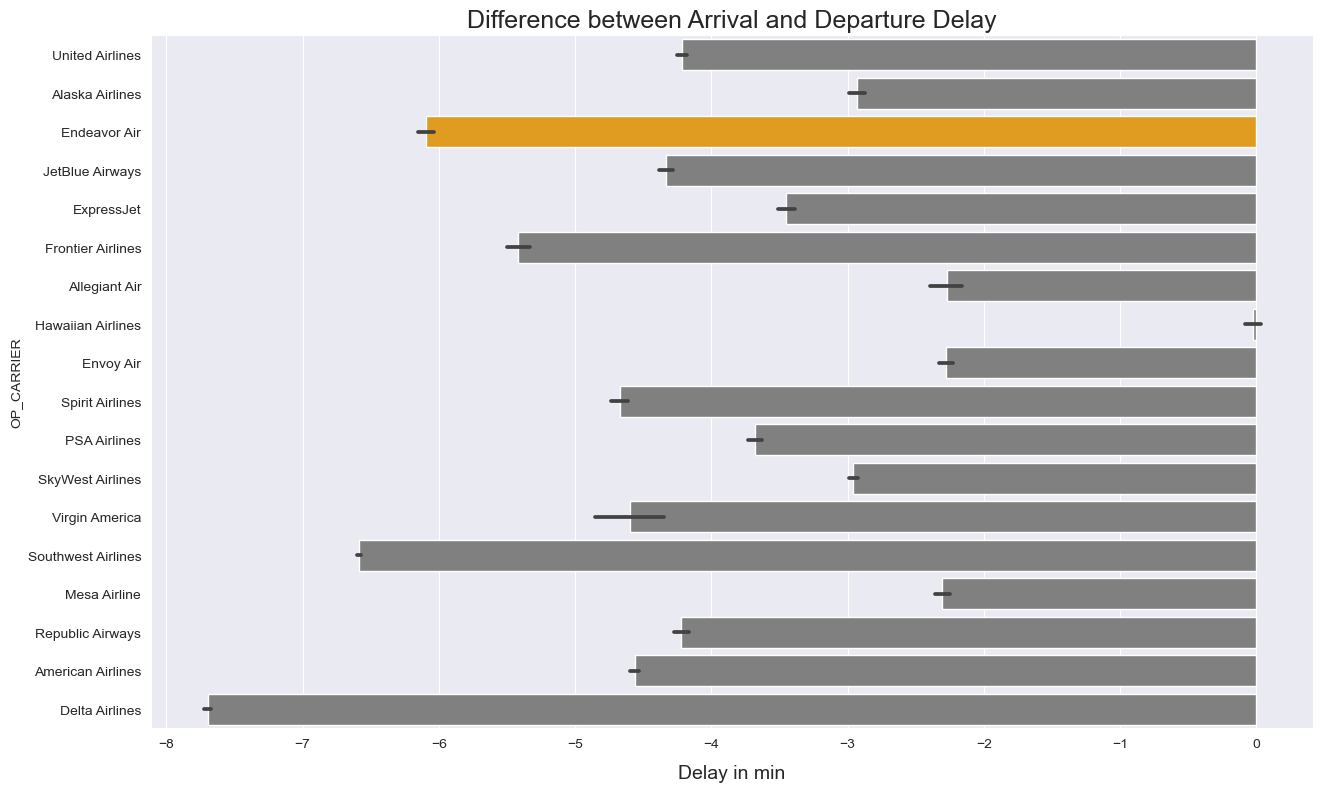

In [60]:
sns.set_style('darkgrid')

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="ARR-DEP_DELAY", y="OP_CARRIER", data=df1, palette=["grey" if y!='Delta Airlines' else "orange" for y in cities_airline.OP_CARRIER])
plt.title('Difference between Arrival and Departure Delay', fontsize=18)
plt.xlabel('Delay in min', fontsize=14, labelpad=10);
plt.show()